In [1]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

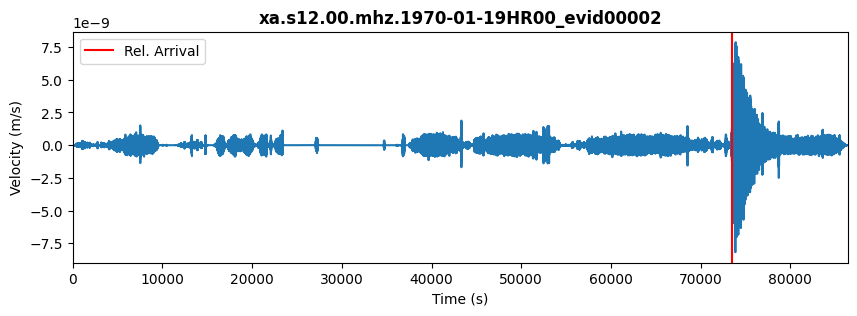

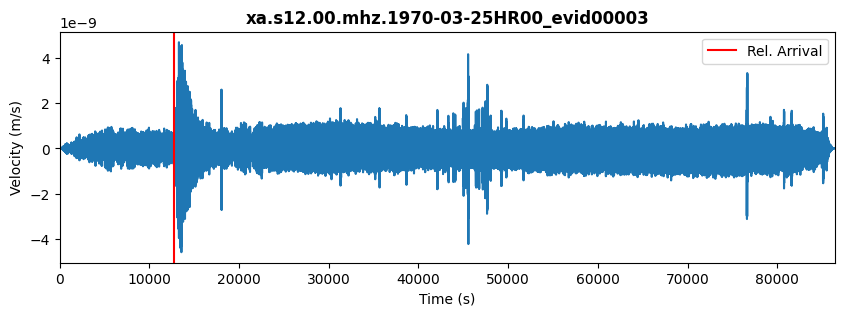

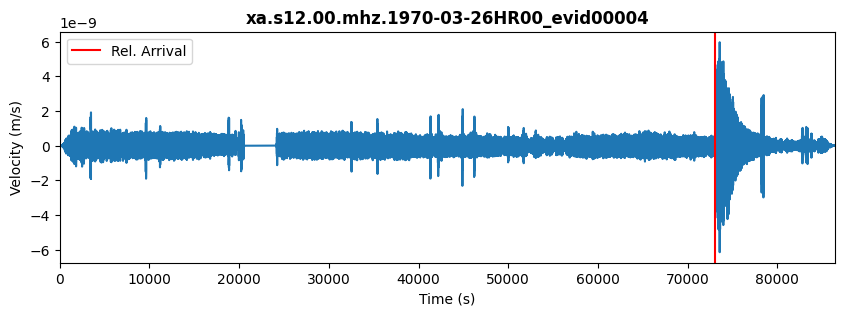

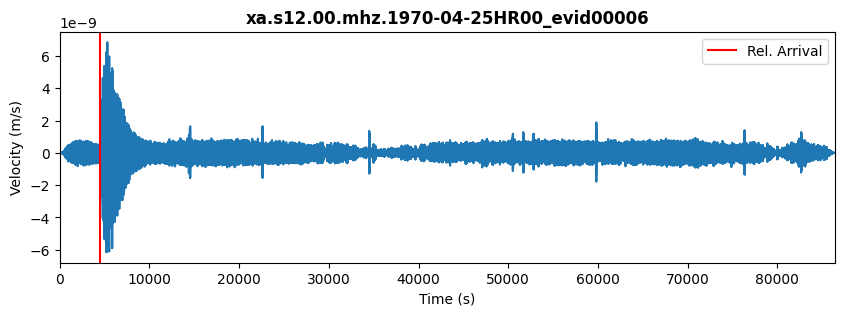

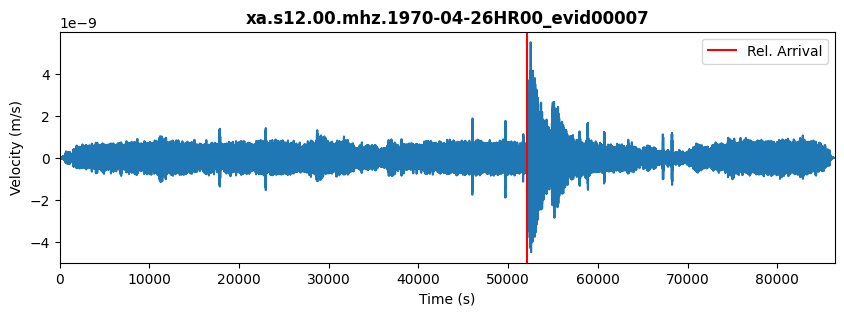

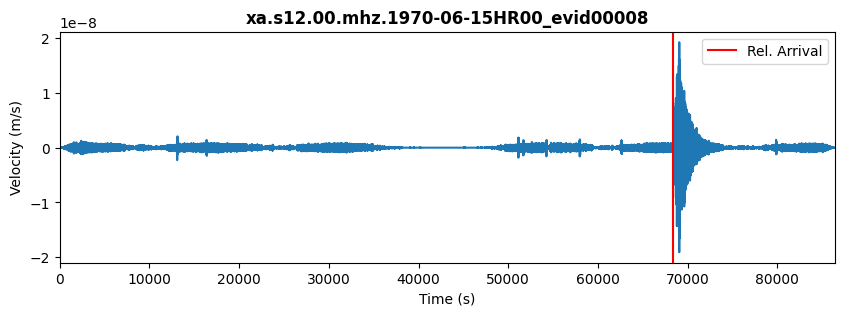

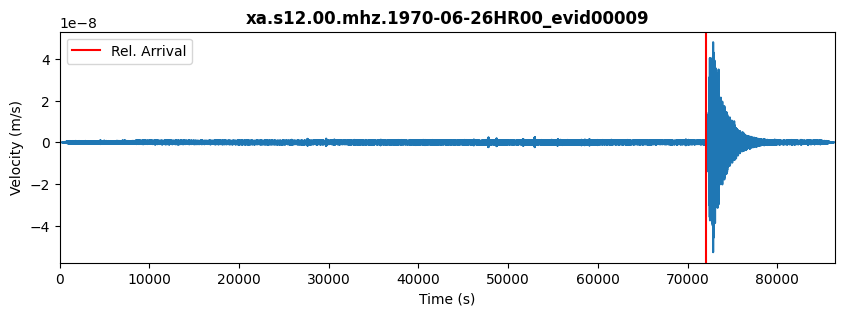

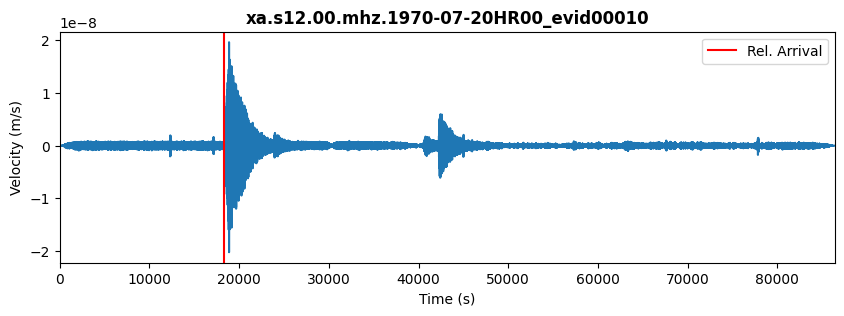

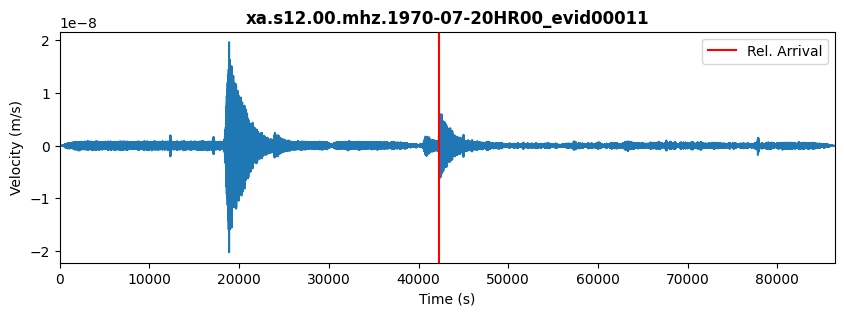

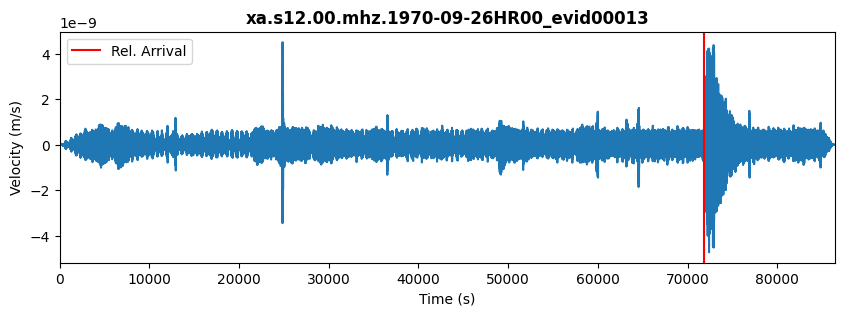

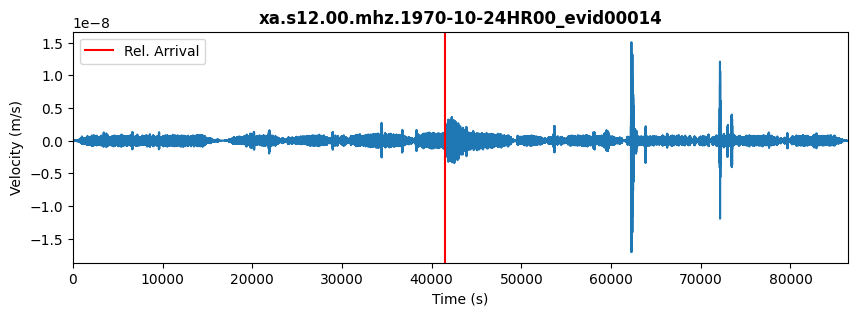

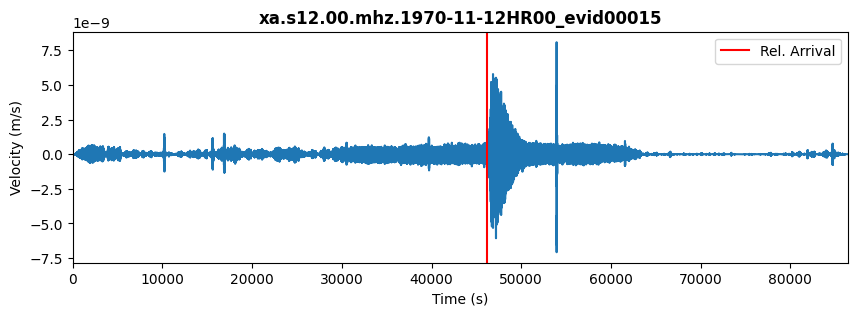

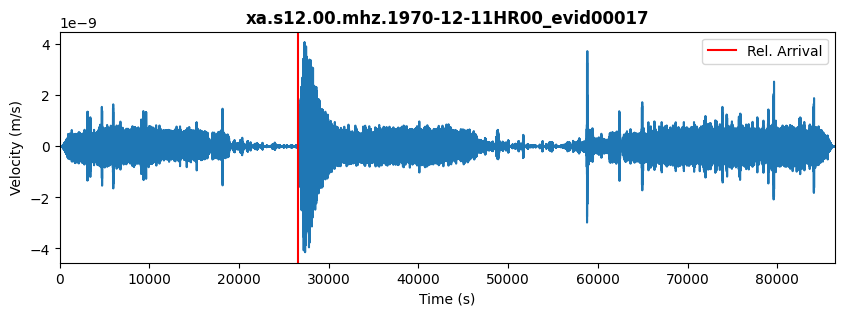

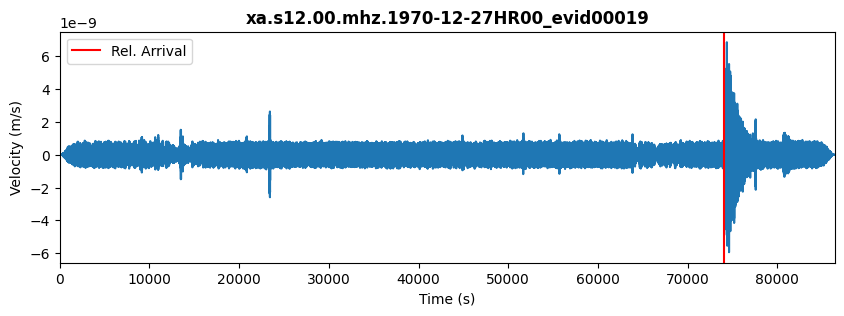

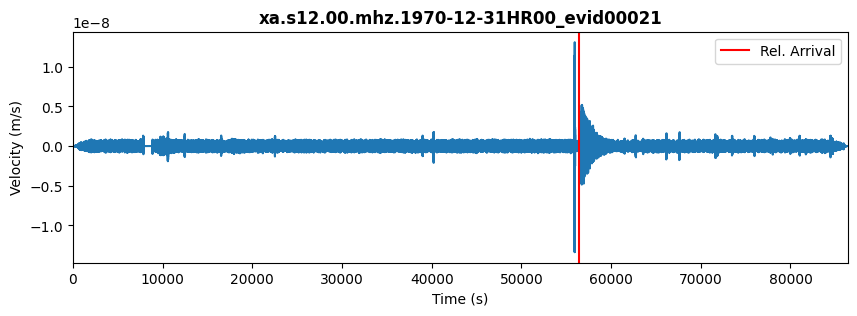

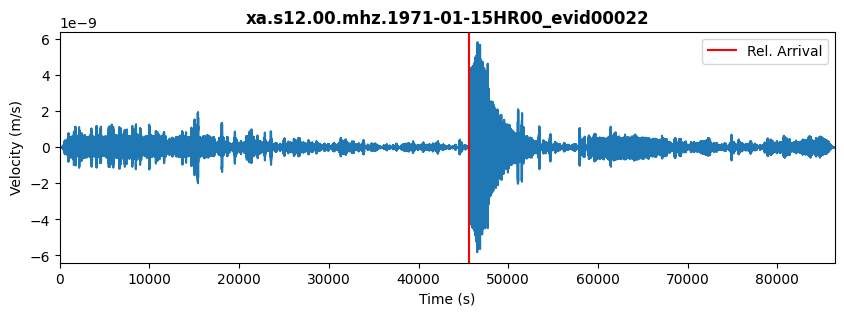

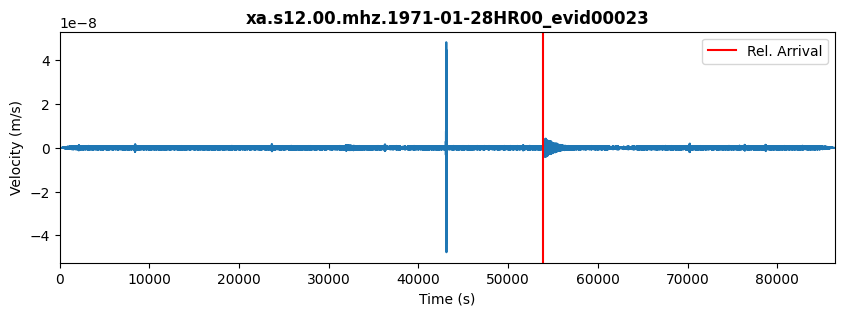

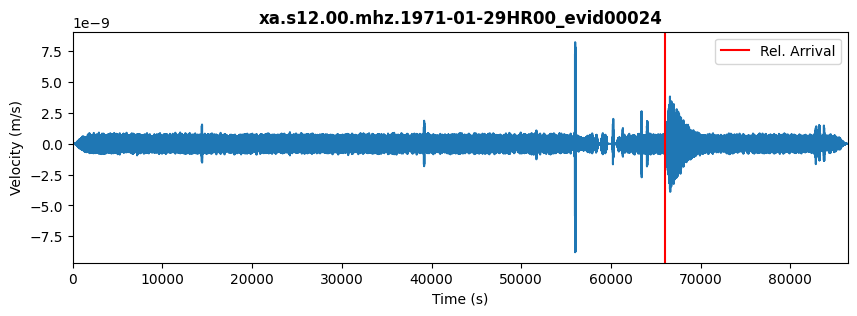

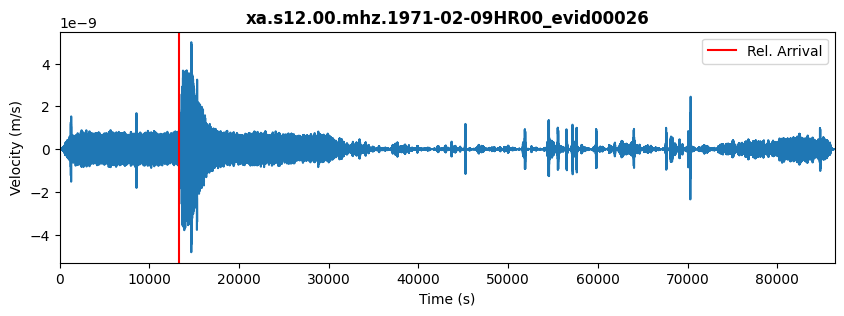

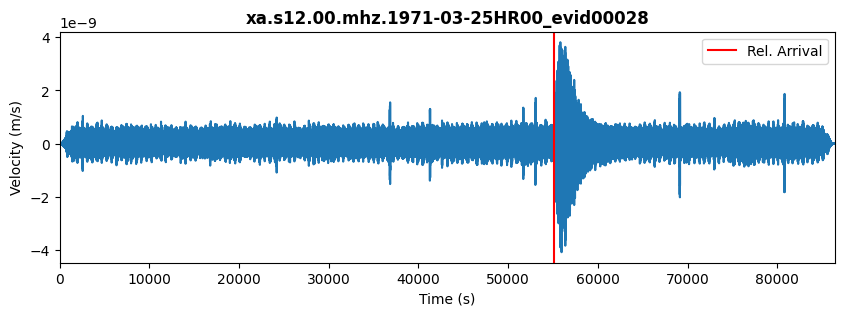

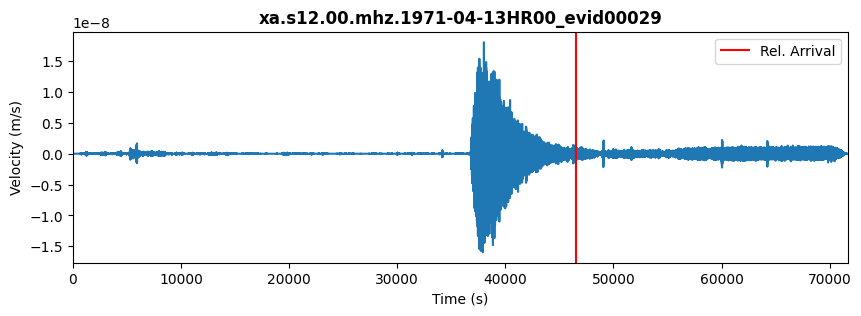

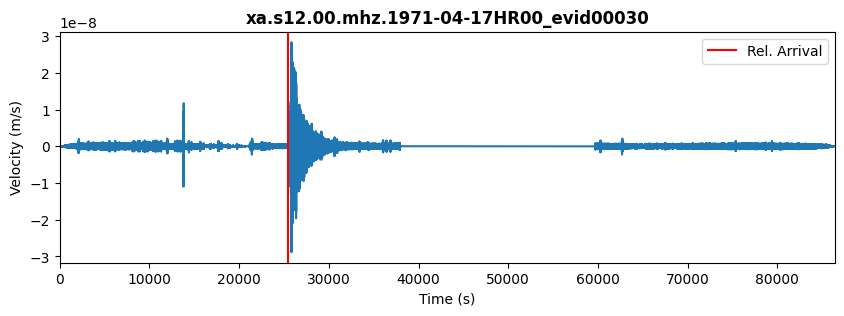

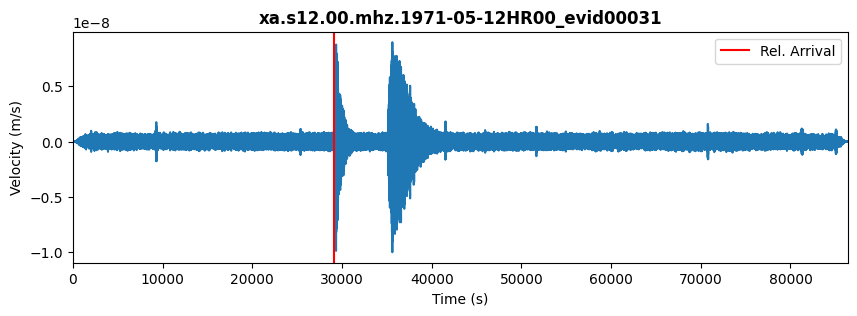

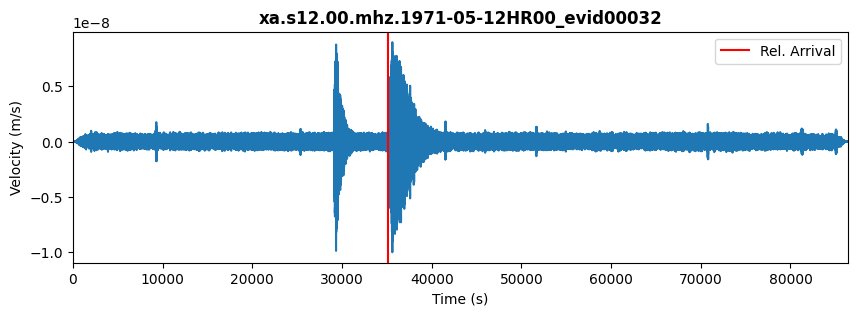

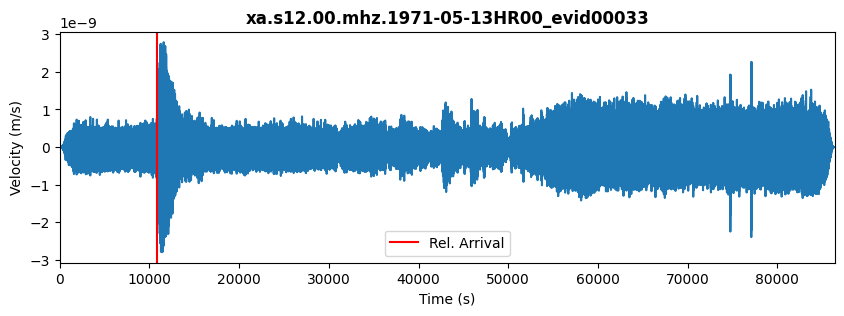

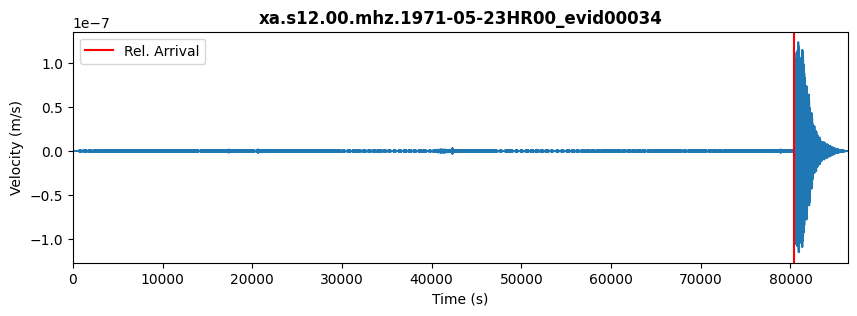

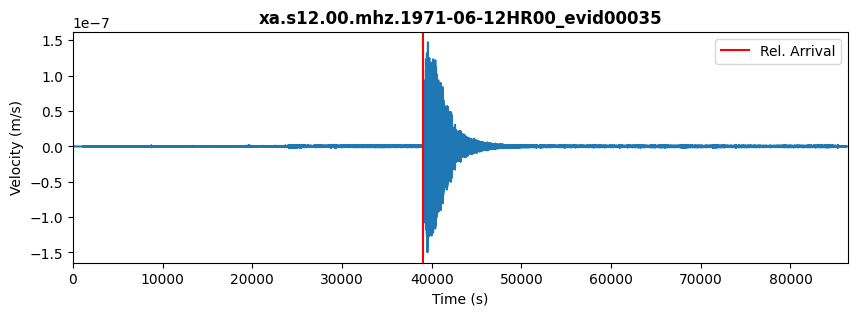

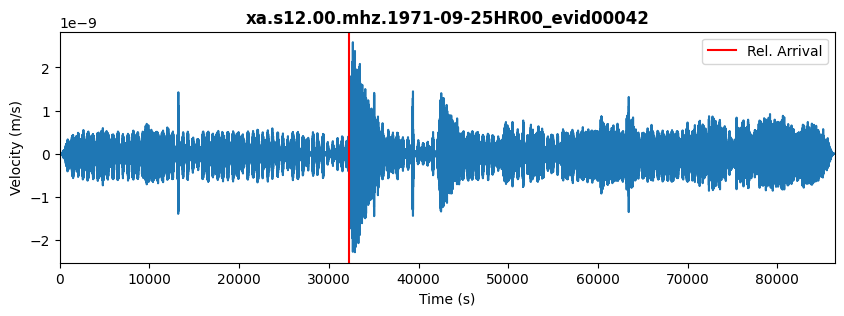

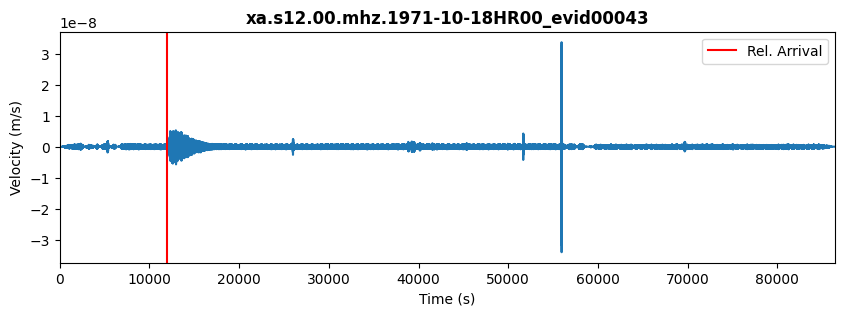

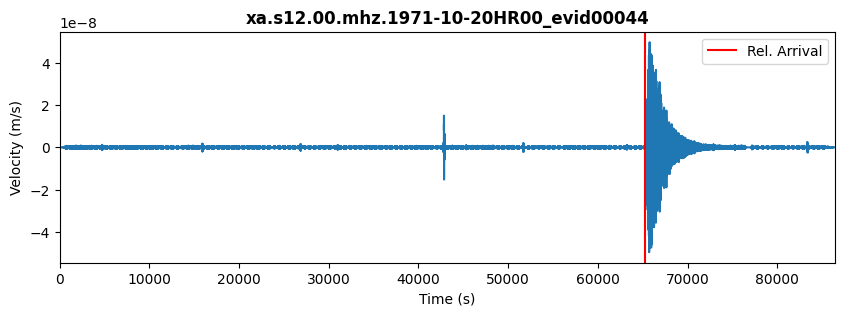

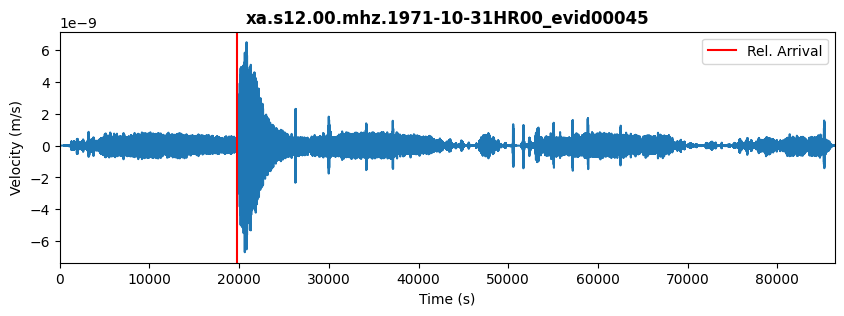

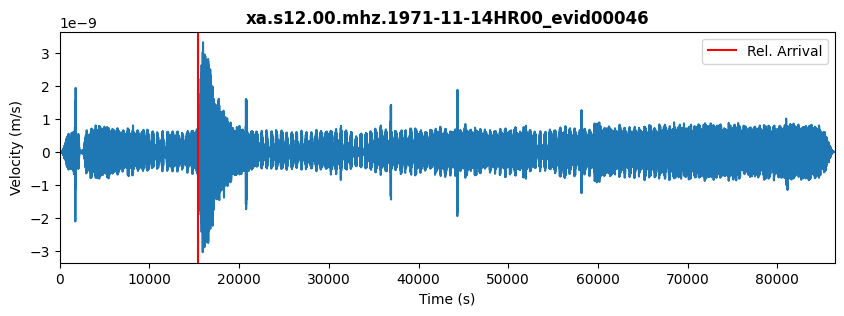

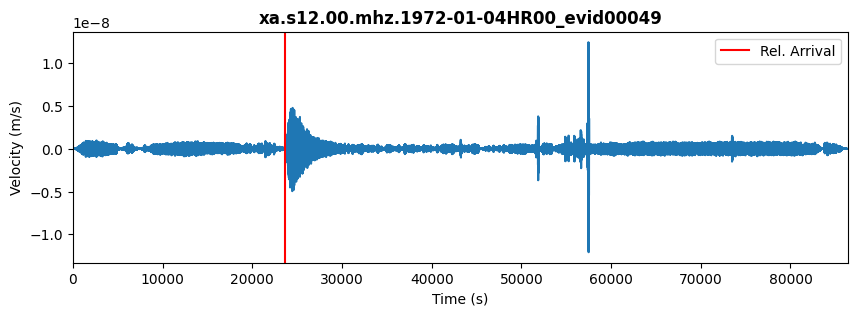

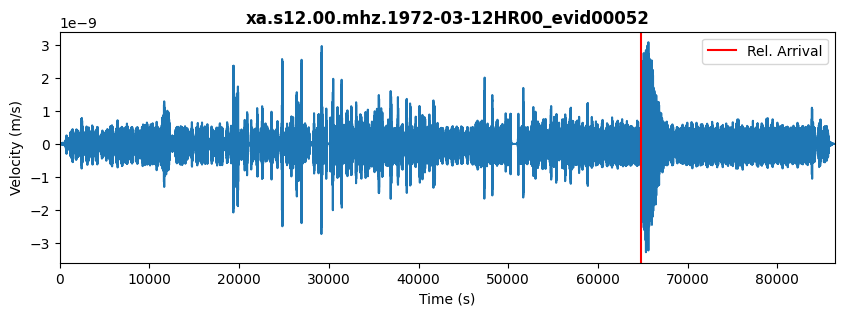

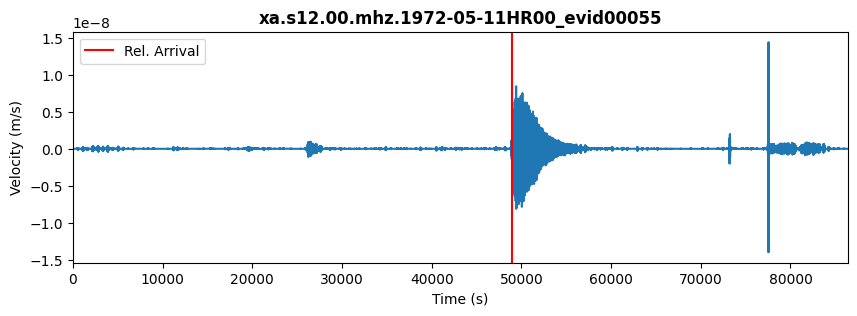

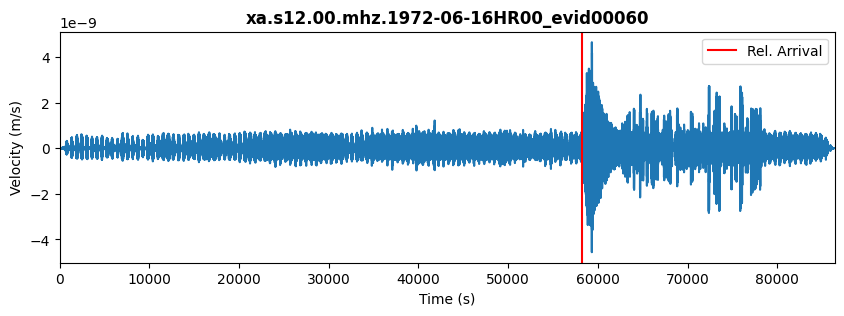

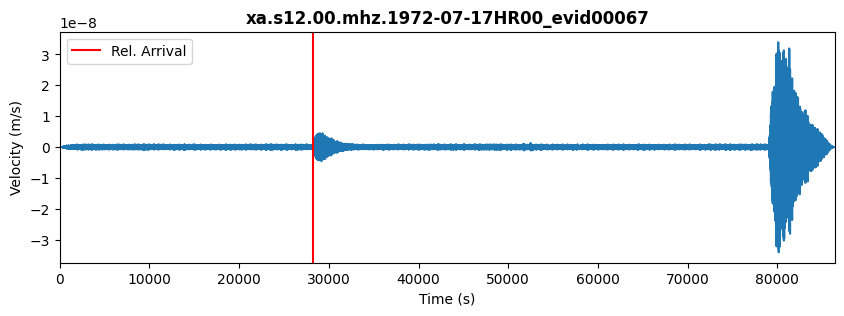

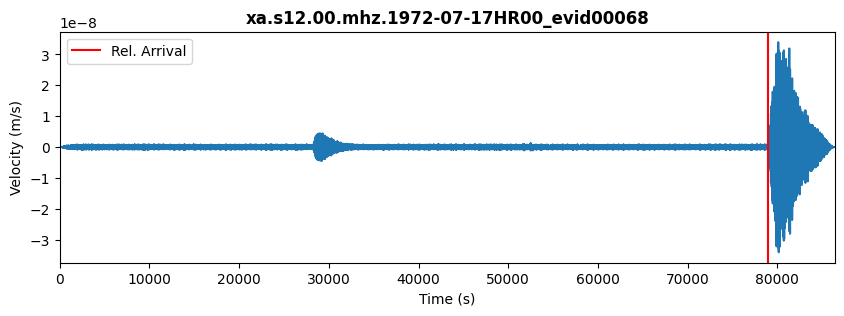

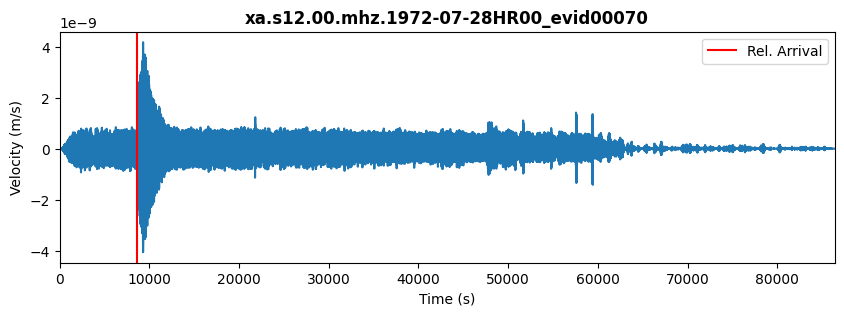

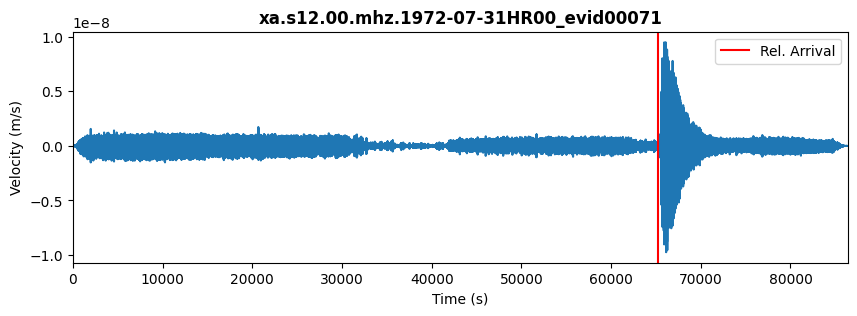

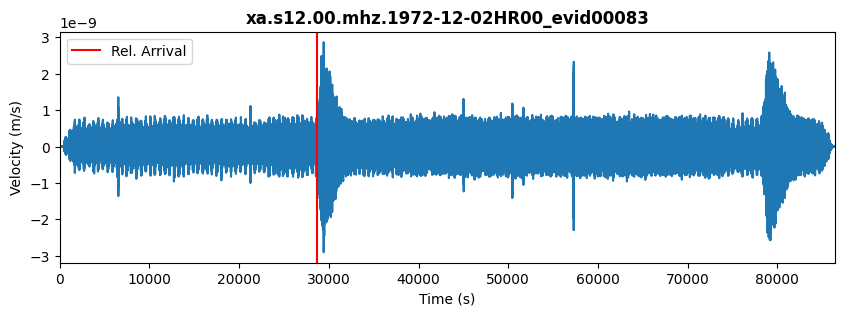

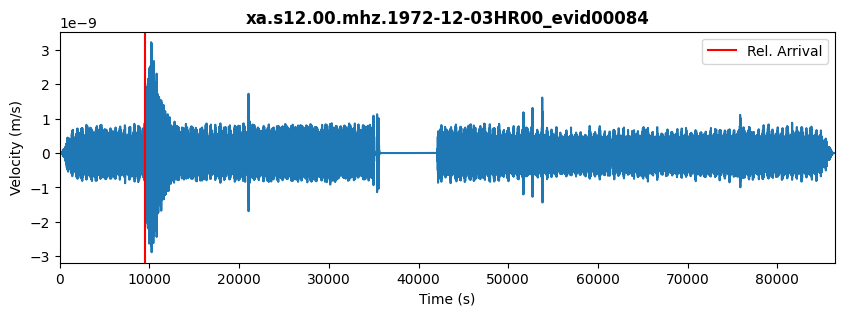

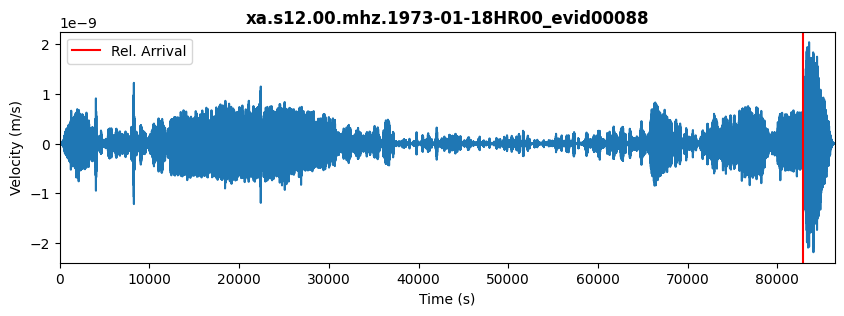

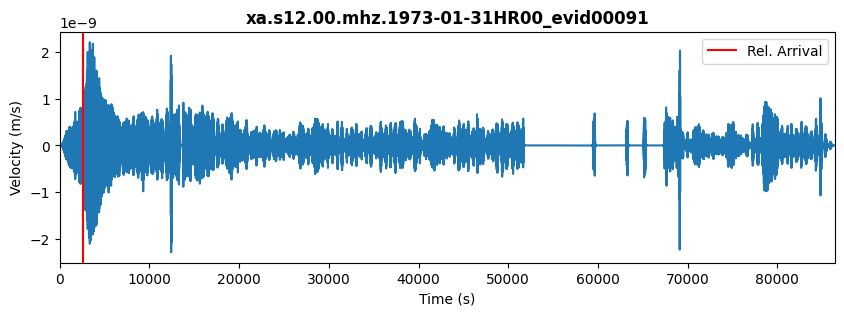

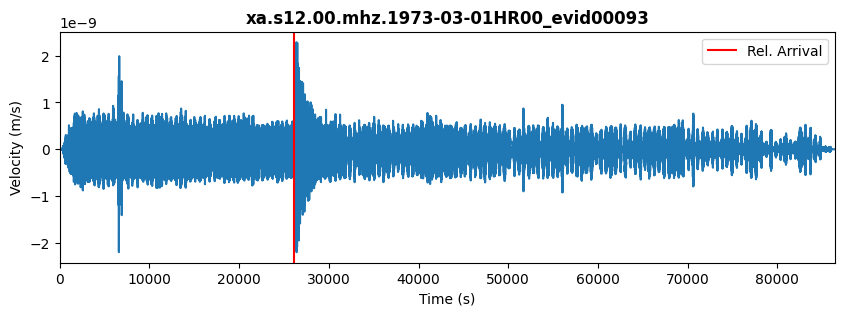

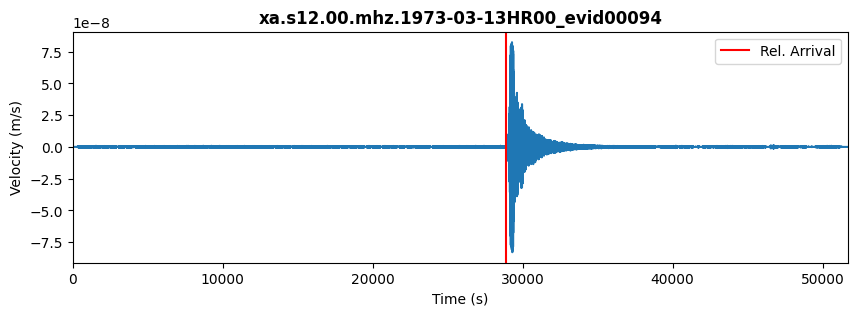

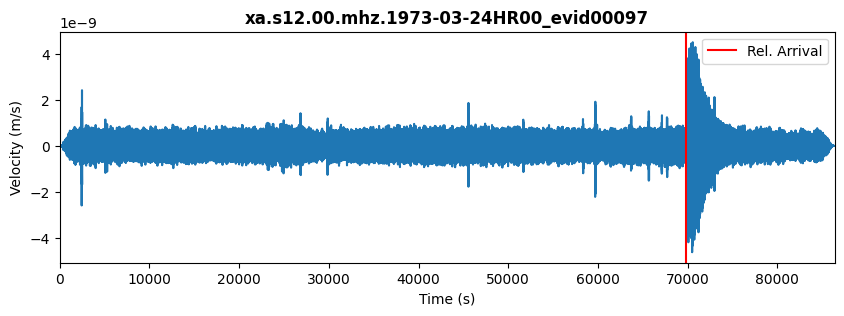

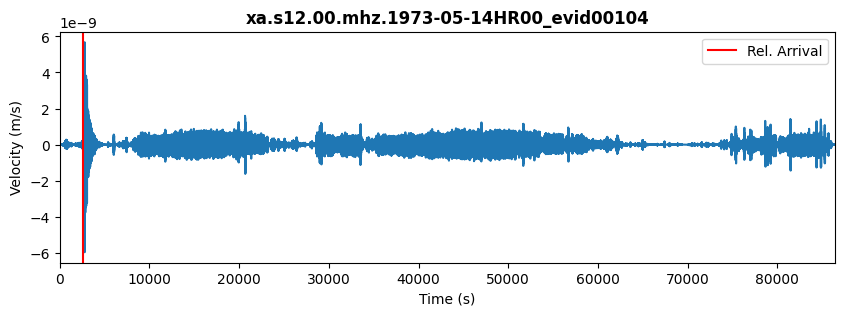

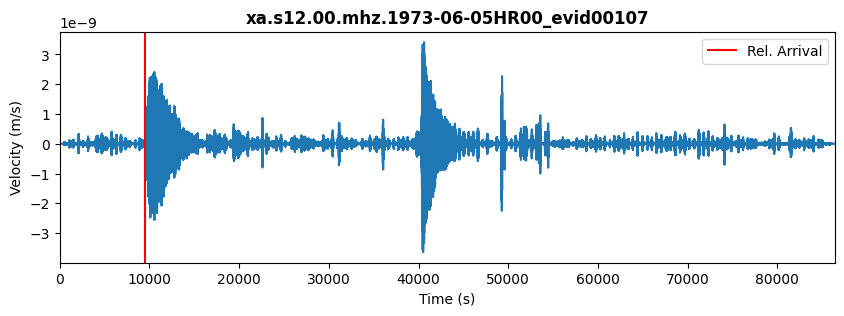

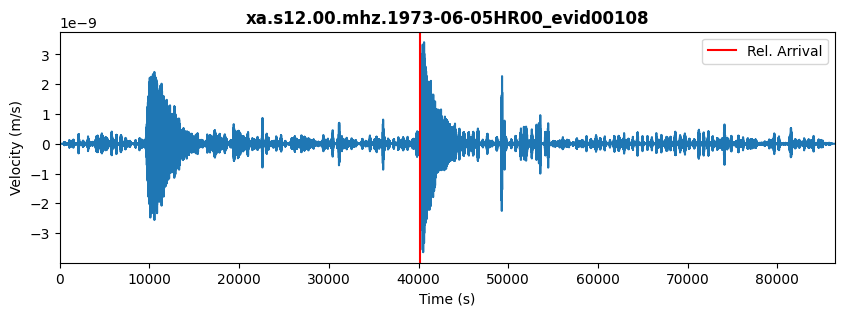

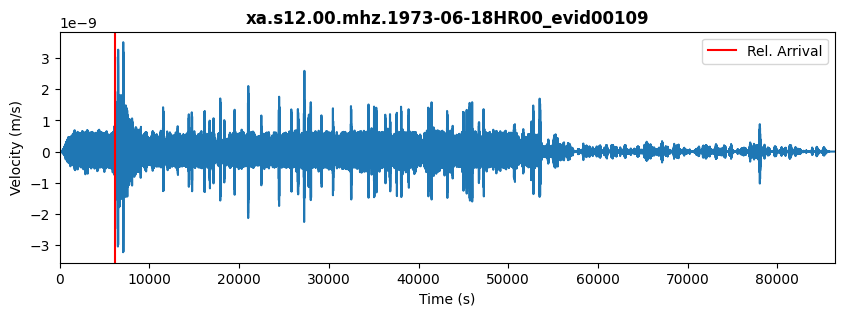

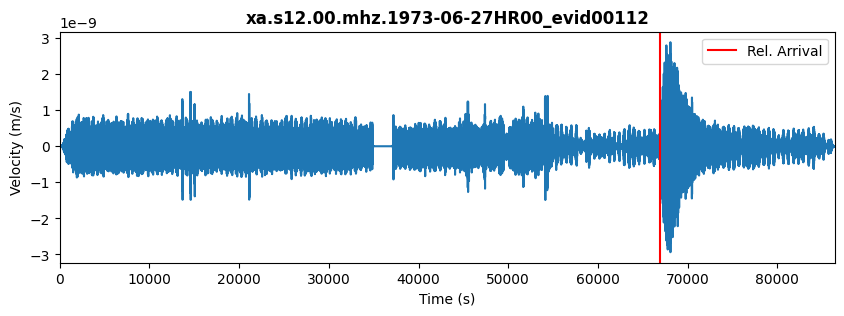

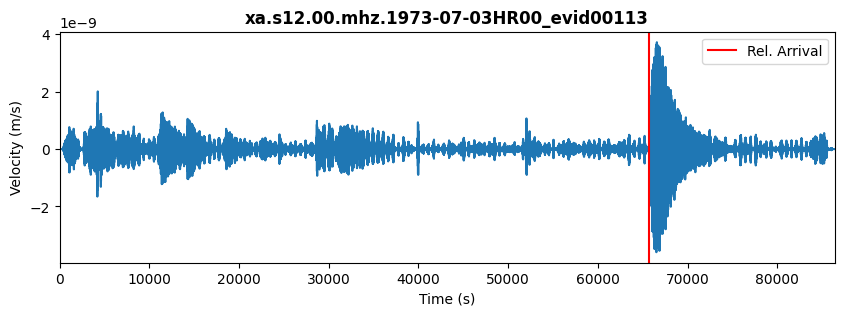

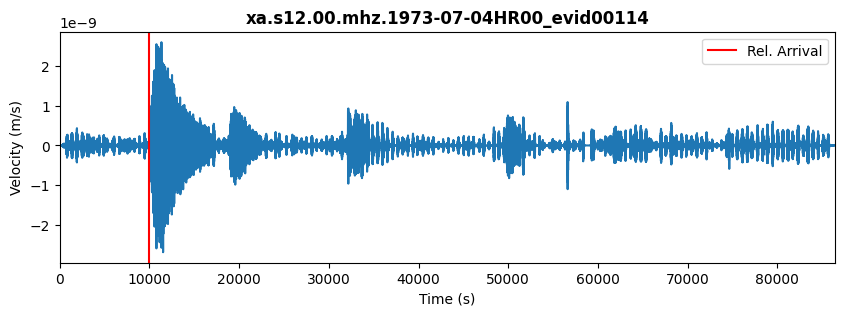

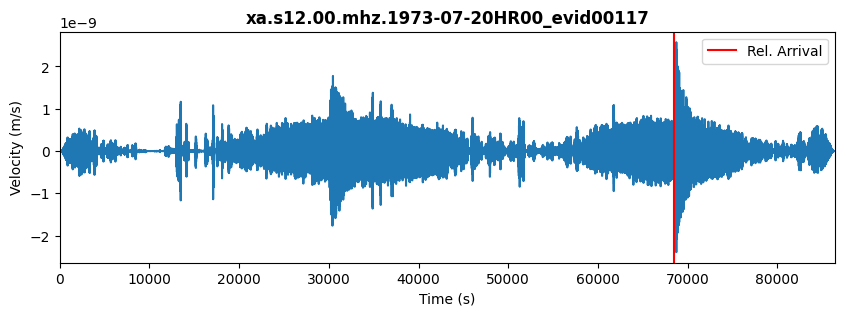

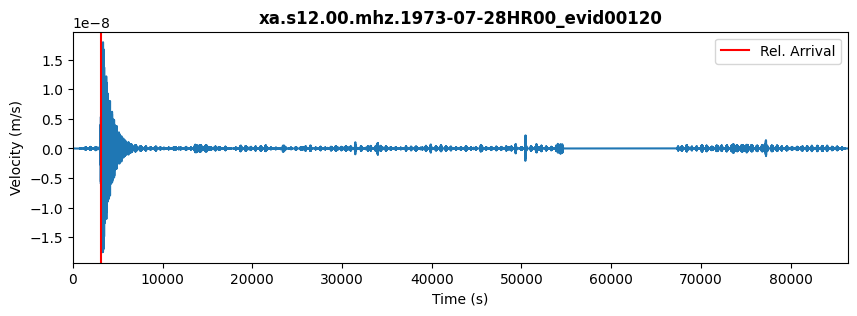

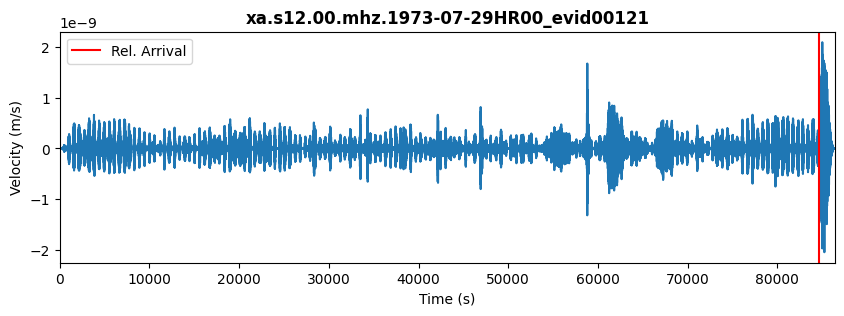

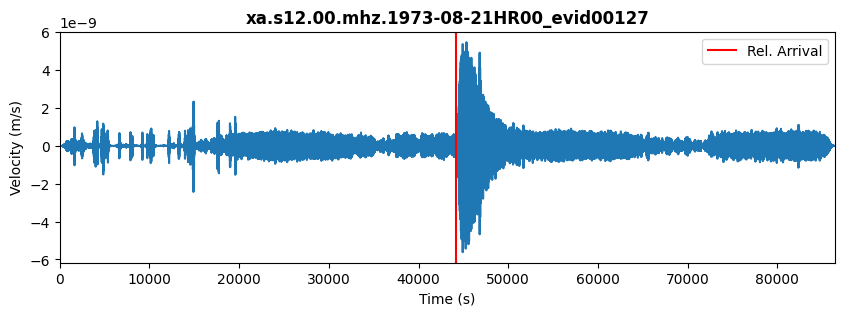

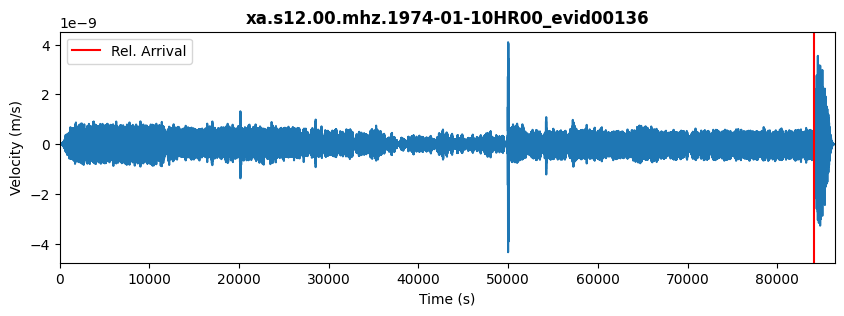

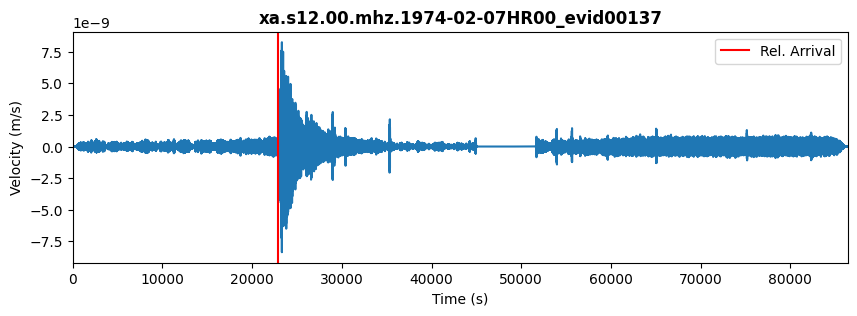

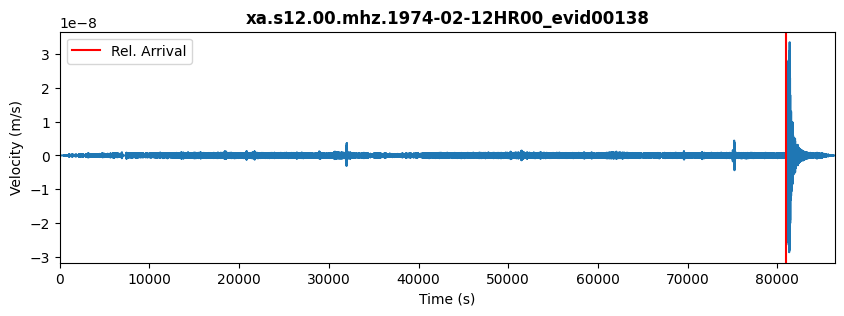

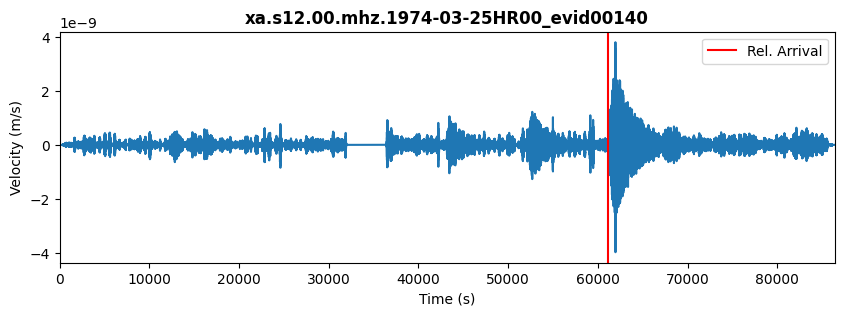

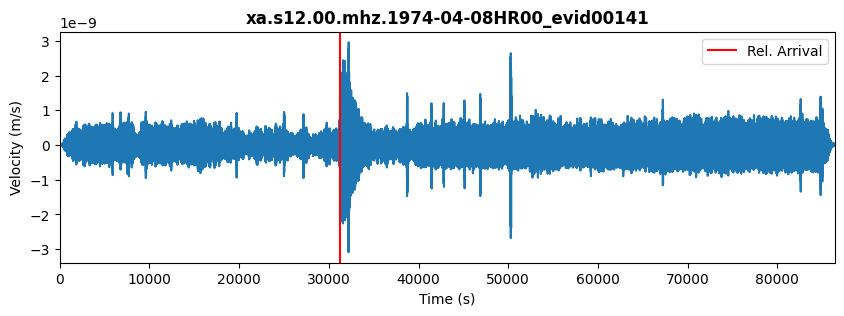

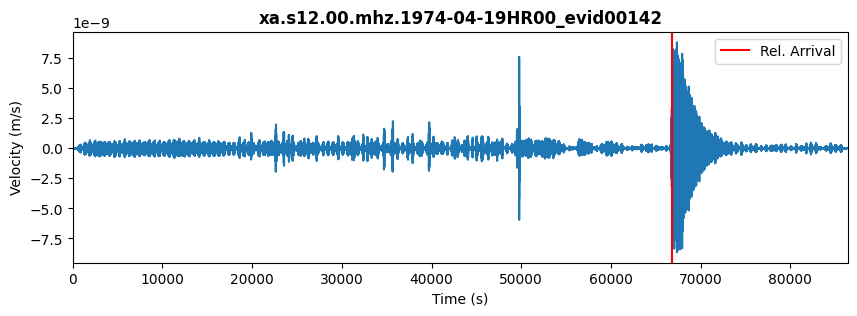

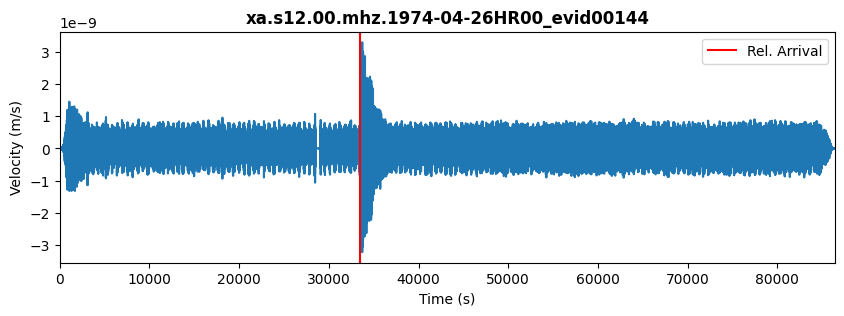

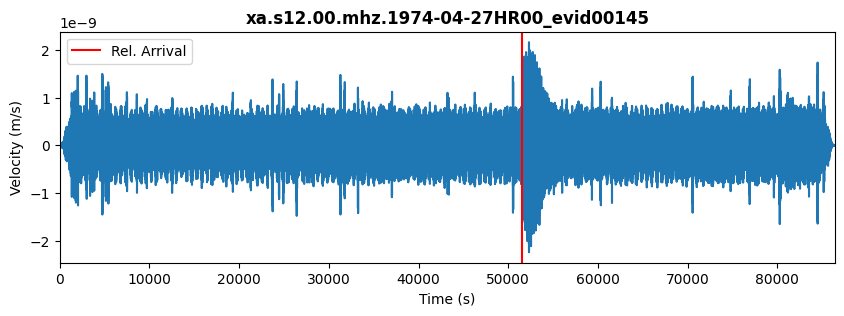

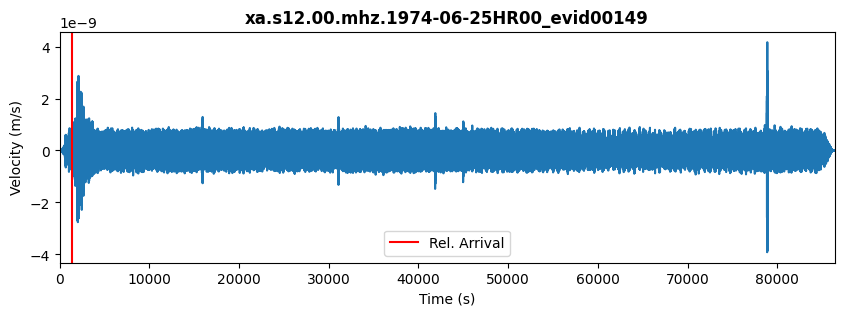

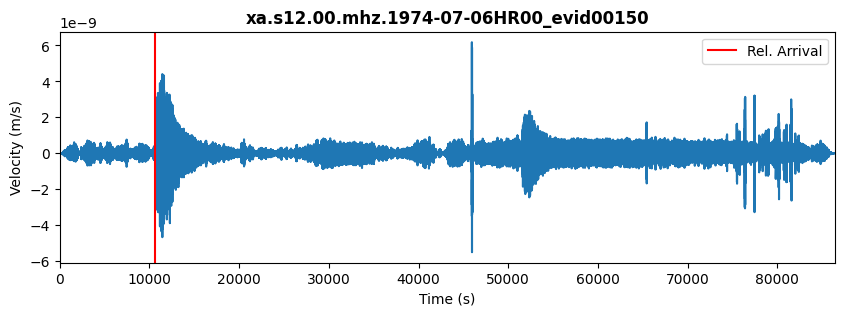

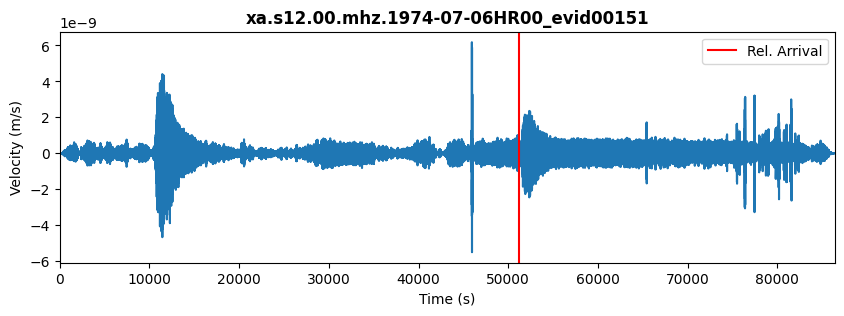

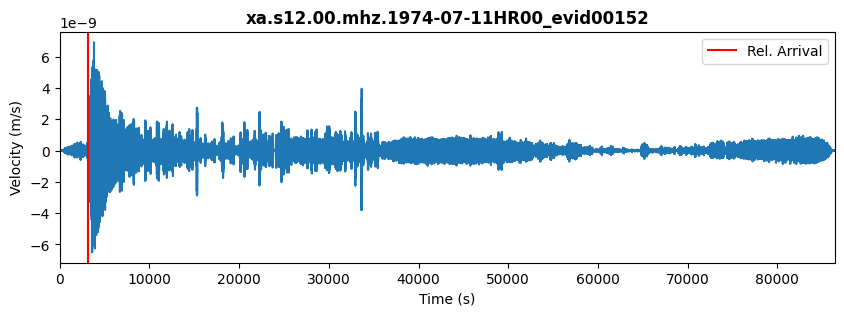

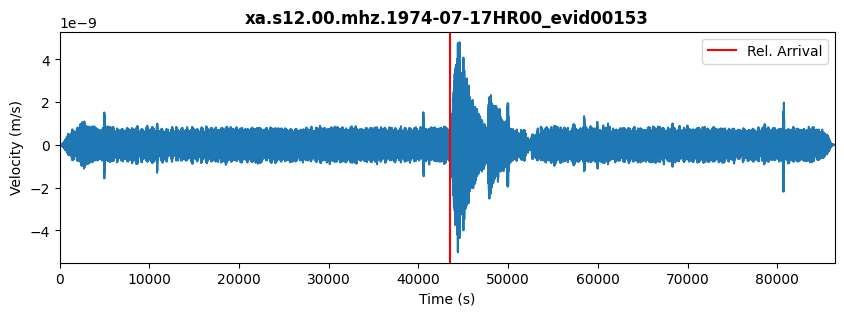

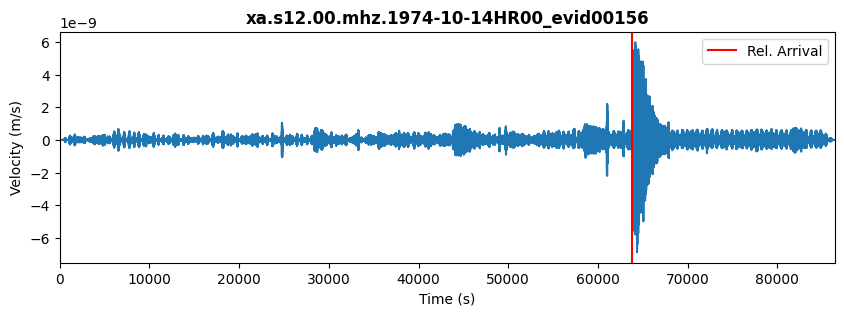

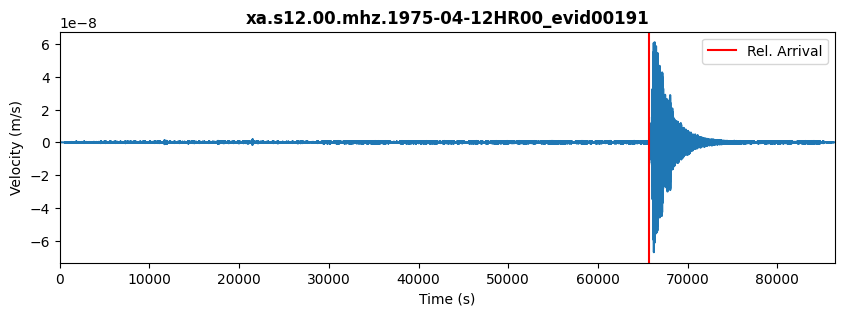

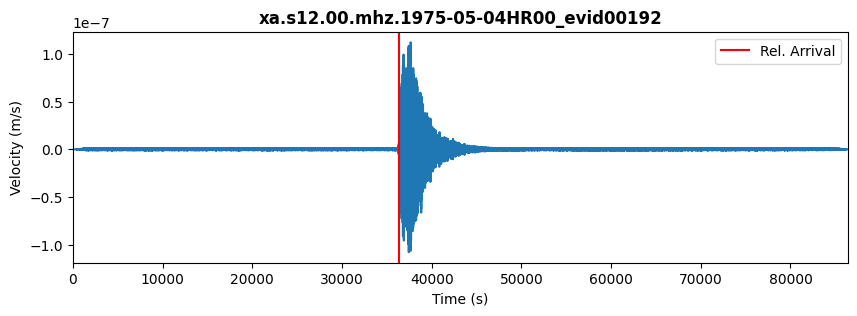

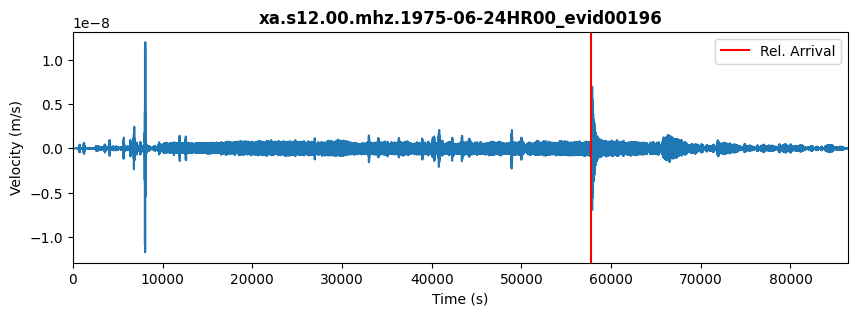

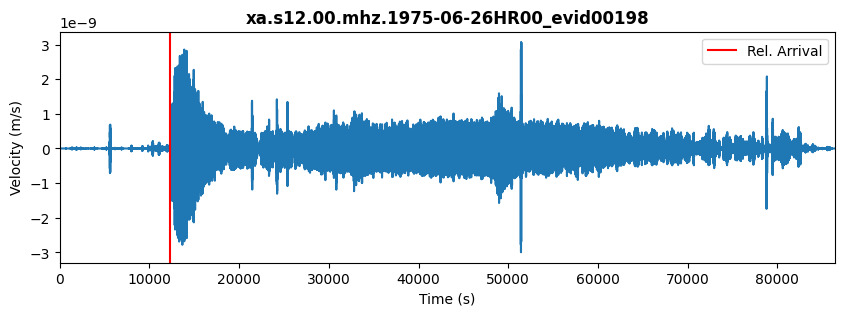

In [5]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)

def plot_file(index):
    row = cat.iloc[index]
    arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
    arrival_time_rel = row['time_rel(sec)']
    test_filename = row.filename
    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = f'{data_directory}{test_filename}.csv'
    data_cat = pd.read_csv(csv_file)
    # Read in time steps and velocities
    csv_times = np.array(data_cat['time_rel(sec)'].tolist())
    csv_data = np.array(data_cat['velocity(m/s)'].tolist())

    # Plot the trace! 
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(csv_times,csv_data)

    # Make the plot pretty
    ax.set_xlim([min(csv_times),max(csv_times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    ax.set_title(f'{test_filename}', fontweight='bold')

    # Plot where the arrival time is
    arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
    ax.legend(handles=[arrival_line])

    plt.show()

for n in range(0, len(cat)):
    plot_file(n)